In [2]:
# Set the current directory to be the repo's parent directory
# This needs to be be updated for your local machine
import os
os.chdir("/Users/erjo3868/repos/chem-embed/chem-embed")

In [18]:
from src.constants import DATA_DIR, EMBEDDINGS_DIR, INDICES_DIR
from src.utils import decompress_and_unpickle
import seaborn as sns
from src.plot_utils import fig_setup, set_title_axes_labels, finalize

/Users/erjo3868/repos/chem-embed/chem-embed/src/plot_utils.py:111: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False)
/Users/erjo3868/repos/chem-embed/chem-embed/src/plot_utils.py:111: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False)


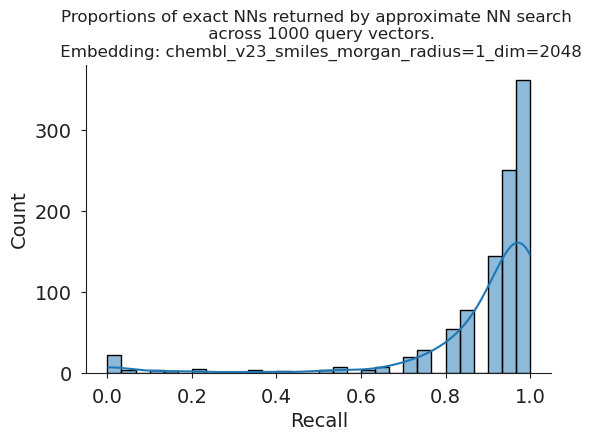

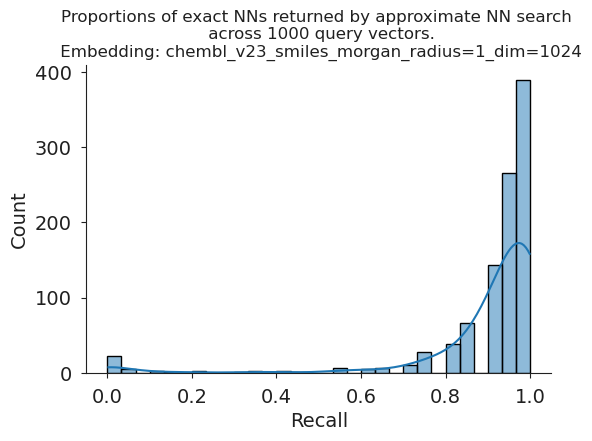

In [28]:
embedding_stems = [
    "chembl_v23_smiles_morgan_radius=1_dim=2048",
    "chembl_v23_smiles_morgan_radius=1_dim=1024"
]

for embedding_stem in embedding_stems:
    flat_file = INDICES_DIR / f"{embedding_stem}.flat.result.pkl"
    hnsw_file = INDICES_DIR / f"{embedding_stem}.hnsw-32.result.pkl"
    flat_result = decompress_and_unpickle(flat_file)
    hnsw_result = decompress_and_unpickle(hnsw_file)
    # result_file_path = INDICES_DIR / f"{embedding.stem}.{name}.result.pkl"
    flat_nns = flat_result.nn_ids
    hnsw_nns = hnsw_result.nn_ids
    assert flat_nns.shape == hnsw_nns.shape

    recalls = []
    for row_num in range(flat_nns.shape[0]):
        recalls.append(
            len(set(flat_nns[row_num]).intersection(set(hnsw_nns[row_num]))) / flat_nns.shape[1]
        )

    _, axs = fig_setup(1, 1)
    _=sns.histplot(recalls, bins=30, kde=True, ax=axs[0])
    set_title_axes_labels(
        ax=axs[0], xlabel="Recall",
        title=(
            f"Proportions of exact NNs returned by approximate NN search \n across {flat_nns.shape[0]} query vectors. \n"
            "Embedding: {embedding_stem}\n"
            "Flat index: "
        ),
        ylabel="Count"
    )

    finalize(axs)
